In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
#Loading the dataset
eye_data = pd.read_csv("/home/oem/Documents/BBIT/3.2/AI/KNN/Eye.csv")

In [3]:
#Checking top 10 records of Dataset..
eye_data.head(10)

,recordId,age,spectaclePrescription,astigmatic,tearRroductionRate,classLabelLenses
0,1,young,myope,no,reduced,noncontact
1,2,young,myope,no,normal,soft contact
2,3,young,myope,yes,reduced,noncontact
3,4,young,myope,yes,normal,hard contact
4,5,young,hypermetrope,no,reduced,noncontact
5,6,young,hypermetrope,no,normal,soft contact
6,7,young,hypermetrope,yes,reduced,noncontact
7,8,young,hypermetrope,yes,normal,hard contact
8,9,pre-presbyopic,myope,no,reduced,noncontact
9,10,pre-presbyopic,myope,no,normal,soft contact


In [4]:
#Basic Information regarding data
eye_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   recordId               10 non-null     int64 
 1   age                    10 non-null     object
 2   spectaclePrescription  10 non-null     object
 3   astigmatic             10 non-null     object
 4   tearRroductionRate     10 non-null     object
 5   classLabelLenses       10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [5]:
#Data points count value for each class labels..
eye_data.astigmatic.value_counts()

no     6
yes    4
Name: astigmatic, dtype: int64

In [6]:
#Data points count value for each class labels..
eye_data.age.value_counts()

young             8
pre-presbyopic    2
Name: age, dtype: int64

In [7]:
#Data points count value for each class labels..
eye_data.astigmatic.value_counts()

no     6
yes    4
Name: astigmatic, dtype: int64

In [8]:
#Data points count value for each class labels..
eye_data.classLabelLenses.value_counts()

noncontact      5
soft contact    3
hard contact    2
Name: classLabelLenses, dtype: int64

In [9]:
#Data points count value for each class labels..
eye_data.tearRroductionRate.value_counts()

reduced    5
normal     5
Name: tearRroductionRate, dtype: int64

In [10]:
eye_data.spectaclePrescription.value_counts()

myope           6
hypermetrope    4
Name: spectaclePrescription, dtype: int64

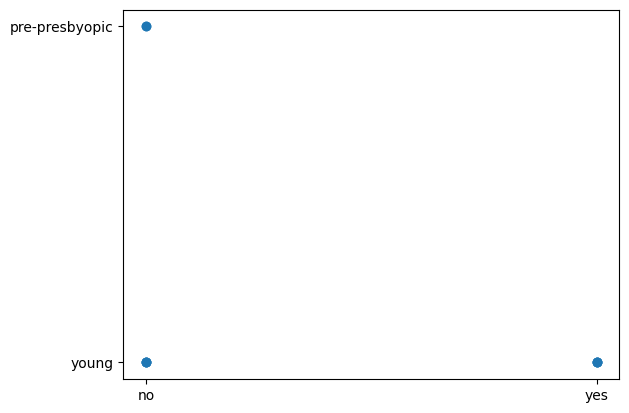

In [11]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(eye_data['astigmatic'],eye_data['age'])
plt.show()

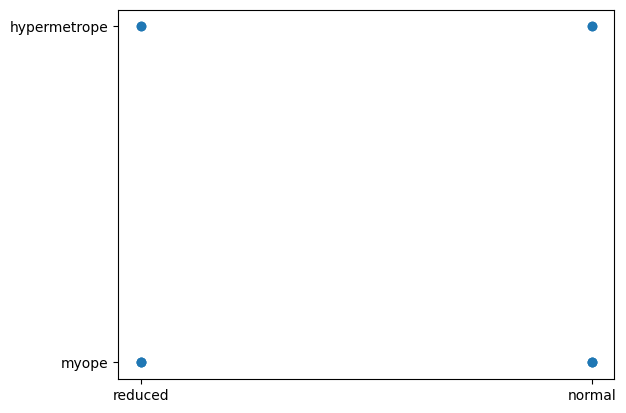

In [12]:
plt.scatter(eye_data['tearRroductionRate'],eye_data['spectaclePrescription'])
plt.show()

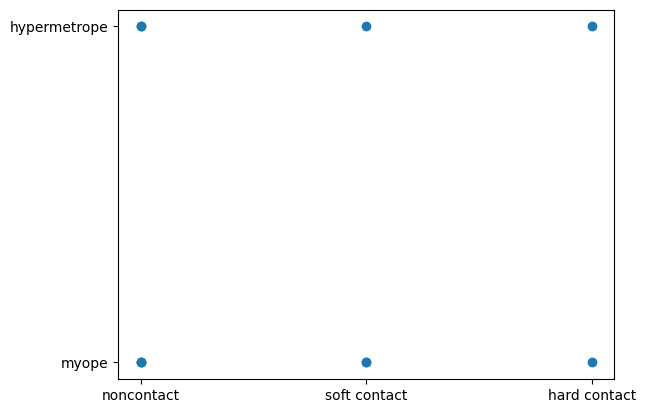

In [13]:
plt.scatter(eye_data['classLabelLenses'],eye_data['spectaclePrescription'])
plt.show()

In [14]:
# Building Classification Model
#Imporing few library for create Decision tree classifier and visualizing the tree structure'''
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
#separating dependent and independent variables
feature_columns = ['spectaclePrescription', 'astigmatic', 'age','classLabelLenses']
X = eye_data[feature_columns].values
y = eye_data['tearRroductionRate'].values

In [16]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

In [18]:
Xtrain.shape, Xtest.shape

((7, 4), (3, 4))

In [19]:
#Creating the decsion tree
eye_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
eye_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(eye_clf)

ValueError: could not convert string to float: 'hypermetrope'

In [20]:
# need to change hypermetrope to string 
# use one hotencoder to change it

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [22]:
eye_data.head()

,recordId,age,spectaclePrescription,astigmatic,tearRroductionRate,classLabelLenses
0,1,young,myope,no,reduced,noncontact
1,2,young,myope,no,normal,soft contact
2,3,young,myope,yes,reduced,noncontact
3,4,young,myope,yes,normal,hard contact
4,5,young,hypermetrope,no,reduced,noncontact


In [23]:
eye_data.head(6)


,recordId,age,spectaclePrescription,astigmatic,tearRroductionRate,classLabelLenses
0,1,young,myope,no,reduced,noncontact
1,2,young,myope,no,normal,soft contact
2,3,young,myope,yes,reduced,noncontact
3,4,young,myope,yes,normal,hard contact
4,5,young,hypermetrope,no,reduced,noncontact
5,6,young,hypermetrope,no,normal,soft contact


In [24]:
N=eye_data.iloc[:,:].values

In [25]:
labelencoder_X=LabelEncoder()
N[:,3]=labelencoder_X.fit_transform(N[:,3])
N[:,2]=labelencoder_X.fit_transform(N[:,2])
N[:,1]=labelencoder_X.fit_transform(N[:,1])
# N[:,4]=labelencoder_X.fit_transform(N[:,4])
N[:,5]=labelencoder_X.fit_transform(N[:,5])

In [26]:
eye_data.head(10)

,recordId,age,spectaclePrescription,astigmatic,tearRroductionRate,classLabelLenses
0,1,young,myope,no,reduced,noncontact
1,2,young,myope,no,normal,soft contact
2,3,young,myope,yes,reduced,noncontact
3,4,young,myope,yes,normal,hard contact
4,5,young,hypermetrope,no,reduced,noncontact
5,6,young,hypermetrope,no,normal,soft contact
6,7,young,hypermetrope,yes,reduced,noncontact
7,8,young,hypermetrope,yes,normal,hard contact
8,9,pre-presbyopic,myope,no,reduced,noncontact
9,10,pre-presbyopic,myope,no,normal,soft contact


In [27]:
Z=pd.DataFrame(N)

In [28]:
Z

,0,1,2,3,4,5
0,1,1,1,0,reduced,1
1,2,1,1,0,normal,2
2,3,1,1,1,reduced,1
3,4,1,1,1,normal,0
4,5,1,0,0,reduced,1
5,6,1,0,0,normal,2
6,7,1,0,1,reduced,1
7,8,1,0,1,normal,0
8,9,0,1,0,reduced,1
9,10,0,1,0,normal,2


In [29]:
# X = eye_data[feature_columns].values
X

array([['myope', 'no', 'young', 'noncontact'],
       ['myope', 'no', 'young', 'soft contact'],
       ['myope', 'yes', 'young', 'noncontact'],
       ['myope', 'yes', 'young', 'hard contact'],
       ['hypermetrope', 'no', 'young', 'noncontact'],
       ['hypermetrope', 'no', 'young', 'soft contact'],
       ['hypermetrope', 'yes', 'young', 'noncontact'],
       ['hypermetrope', 'yes', 'young', 'hard contact'],
       ['myope', 'no', 'pre-presbyopic', 'noncontact'],
       ['myope', 'no', 'pre-presbyopic', 'soft contact']], dtype=object)

In [30]:
y

array(['reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal',
       'reduced', 'normal', 'reduced', 'normal'], dtype=object)

In [31]:
l=Z[3].values

In [32]:
l

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=object)

In [33]:
l=Z['astigmatic'].values

KeyError: 'astigmatic'

In [34]:
feature_columns = [1,2,3,5]
X = Z[feature_columns].values
y = Z[4].values

In [35]:
#Data Splitting
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

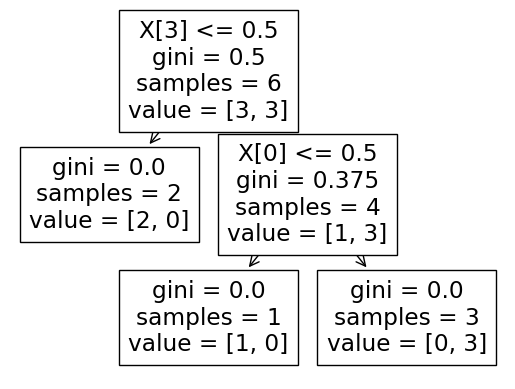

In [37]:
#Creating the decsion tree
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)
#Visualized the Tree which is formed on train dataset
tree.plot_tree(Iris_clf)

In [38]:
y

array(['reduced', 'normal', 'reduced', 'normal', 'reduced', 'normal',
       'reduced', 'normal', 'reduced', 'normal'], dtype=object)

In [39]:
#Accuracy
print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.5


In [40]:
#Checking validation test data on our trained model and getting performance metrices
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Iris_clf.predict(Xcv)

In [41]:
print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 1.0


array([[[0, 0],
        [0, 1]]])

In [42]:
YT_hat = Iris_clf.predict(Xtest)
YT_hat

array(['normal', 'reduced', 'reduced'], dtype=object)

In [43]:
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 0.0 %


array([[[0., 1.],
        [2., 0.]],

       [[0., 2.],
        [1., 0.]]])

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

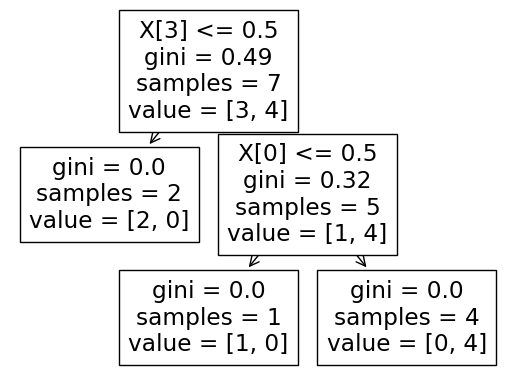

In [44]:
#Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)
#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

In [45]:
#Checking the performance of model on Actual Test data...
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat
print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 0.0 %


array([[[0., 1.],
        [2., 0.]],

       [[0., 2.],
        [1., 0.]]])